In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
from tqdm import tqdm
from cp_functions import *
from scipy.stats import linregress
from scipy.optimize import minimize

# Verification of convergence rate

In [2]:
T = 3
init = [1, 1, 1]
W_current = [2, 2, 2]
W_bar = [2, 2, 2]
Q = [0.6, 0.7, 0.5]
C = [6, 4, 3, 4, 6]
D = [100, 100, 100]
alpha = [0.5, 0.5, 0.5]

In [3]:
upper = solve_cp_post(T, init, W_current, W_bar, Q, C, D, alpha)[0]
print("rel is "+str(upper))

rel is 31.7428406393587


In [4]:
check_proj_degeneracy(T, init, W_bar, Q, C, D, alpha)

problem occurs at constraint 2: 1.0967223647566551e-05
problem occurs at constraint 6: 1.2987683861277722e-05
problem occurs at constraint 6: 1.8459629659123836e-05


[False, False, False]

This problem does NOT satisfy the conditions for Assumption 4.2 of $C^2$-smoothness of the projection policy

In [5]:
my_sigma = [0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3]
for sigma in my_sigma:
    perfs = []
    if sigma <= 0.1:
        repeat_times = 16000
    else:
        repeat_times = 4000
    for _ in tqdm(range(repeat_times)):
        perf = projection_policy(T, init, 0., W_bar, Q, C, D, alpha, sigma)
        perfs.append(perf)
    gap = upper - np.mean(perfs)
    std_err = np.std(perfs)/np.sqrt(len(perfs)-1)
    print("sigma = " + str(sigma) + ", optimality gap of projection is: " + str(gap) + " +- " + str(2*std_err))

100%|██████████| 16000/16000 [38:18<00:00,  6.96it/s]


sigma = 0.025, optimality gap of projection is: 0.056558679049892646 +- 0.0006054499584340025


 28%|██▊       | 4472/16000 [10:43<27:02,  7.11it/s]C:\Users\cyan\AppData\Roaming\Python\Python39\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|██████████| 16000/16000 [38:40<00:00,  6.90it/s]


sigma = 0.05, optimality gap of projection is: 0.12143430158338475 +- 0.0012451590669771162


100%|██████████| 16000/16000 [38:29<00:00,  6.93it/s]


sigma = 0.075, optimality gap of projection is: 0.1881699048128489 +- 0.0018915868186726455


100%|██████████| 16000/16000 [38:54<00:00,  6.85it/s]


sigma = 0.1, optimality gap of projection is: 0.25569422634112726 +- 0.002515681082274868


100%|██████████| 4000/4000 [09:46<00:00,  6.82it/s]


sigma = 0.15, optimality gap of projection is: 0.4045199821479635 +- 0.007902498864402929


100%|██████████| 4000/4000 [09:43<00:00,  6.85it/s]


sigma = 0.2, optimality gap of projection is: 0.5512679389420754 +- 0.010726403887138029


100%|██████████| 4000/4000 [09:45<00:00,  6.83it/s]


sigma = 0.25, optimality gap of projection is: 0.7149618230655221 +- 0.013580158601380864


100%|██████████| 4000/4000 [09:45<00:00,  6.83it/s]

sigma = 0.3, optimality gap of projection is: 0.8692494329600748 +- 0.01621844718197429


In [47]:
my_sigma = [0.125, 0.175, 0.225, 0.275]
for sigma in my_sigma:
    perfs = []
    repeat_times = 4000
    for _ in tqdm(range(repeat_times)):
        perf = projection_policy(T, init, 0., W_bar, Q, C, D, alpha, sigma)
        perfs.append(perf)
    gap = upper - np.mean(perfs)
    std_err = np.std(perfs)/np.sqrt(len(perfs)-1)
    print("sigma = " + str(sigma) + ", optimality gap of projection is: " + str(gap) + " +- " + str(2*std_err))

100%|██████████| 4000/4000 [10:11<00:00,  6.54it/s]


sigma = 0.125, optimality gap of projection is: 0.3332097590467633 +- 0.006568176452206937


100%|██████████| 4000/4000 [10:18<00:00,  6.47it/s]


sigma = 0.175, optimality gap of projection is: 0.47408920917234454 +- 0.009361208356258432


100%|██████████| 4000/4000 [10:30<00:00,  6.34it/s]


sigma = 0.225, optimality gap of projection is: 0.6368769546365698 +- 0.012214055742994263


100%|██████████| 4000/4000 [10:27<00:00,  6.38it/s]

sigma = 0.275, optimality gap of projection is: 0.79699126800379 +- 0.014836846792651582


In [9]:
my_sigma = [0.4, 0.5, 0.6, 0.7, 0.8]
for sigma in my_sigma:
    perfs = []
    repeat_times = 4000
    for _ in tqdm(range(repeat_times)):
        perf = projection_policy(T, init, 0., W_bar, Q, C, D, alpha, sigma)
        perfs.append(perf)
    gap = upper - np.mean(perfs)
    std_err = np.std(perfs)/np.sqrt(len(perfs)-1)
    print("sigma = " + str(sigma) + ", optimality gap of projection is: " + str(gap) + " +- " + str(2*std_err))

100%|██████████| 4000/4000 [08:26<00:00,  7.89it/s]


sigma = 0.4, optimality gap of projection is: 1.1852183686649376 +- 0.021522803974026956


100%|██████████| 4000/4000 [08:21<00:00,  7.98it/s]


sigma = 0.5, optimality gap of projection is: 1.4784855148197984 +- 0.02717273746055259


100%|██████████| 4000/4000 [08:21<00:00,  7.97it/s]


sigma = 0.6, optimality gap of projection is: 1.7802045313796206 +- 0.03197576108964861


100%|██████████| 4000/4000 [08:26<00:00,  7.90it/s]


sigma = 0.7, optimality gap of projection is: 2.083951779128462 +- 0.036886416745433546


100%|██████████| 4000/4000 [08:20<00:00,  8.00it/s]


sigma = 0.8, optimality gap of projection is: 2.336335406953147 +- 0.04023176537405196


100%|██████████| 4000/4000 [08:20<00:00,  7.99it/s]


sigma = 0.9, optimality gap of projection is: 2.4821656781339776 +- 0.043637027644350464


100%|██████████| 4000/4000 [08:25<00:00,  7.92it/s]

sigma = 1.0, optimality gap of projection is: 2.7540237156803222 +- 0.04700182652652129


In [31]:
my_sigma = [0.9,1.0]
for sigma in my_sigma:
    perfs = []
    repeat_times = 4000
    for _ in tqdm(range(repeat_times)):
        perf = projection_policy(T, init, 0., W_bar, Q, C, D, alpha, sigma)
        perfs.append(perf)
    gap = upper - np.mean(perfs)
    std_err = np.std(perfs)/np.sqrt(len(perfs)-1)
    print("sigma = " + str(sigma) + ", optimality gap of projection is: " + str(gap) + " +- " + str(2*std_err))

100%|██████████| 4000/4000 [10:47<00:00,  6.18it/s]


sigma = 0.9, optimality gap of projection is: 2.539605941547265 +- 0.04373609677505471


100%|██████████| 4000/4000 [10:45<00:00,  6.20it/s]

sigma = 1.0, optimality gap of projection is: 2.723099892058606 +- 0.04566346373465483


Plot!

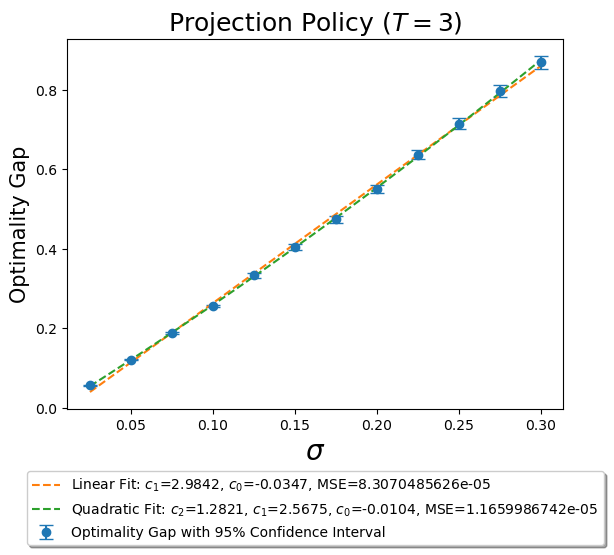

In [5]:
sigmas = [0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3]
gap = [0.056558679049892646, 0.12143430158338475, 0.1881699048128489, 0.25569422634112726, 0.3332097590467633,
       0.4045199821479635, 0.47408920917234454, 0.5512679389420754, 0.6368769546365698, 0.7149618230655221, 
       0.79699126800379, 0.8692494329600748]
ci=[0.0006054499584340025,0.0012451590669771162,0.0018915868186726455,0.002515681082274868,0.0063887917916281315,
    0.007902498864402929,0.009196290998691145,0.010726403887138029, 0.011790368736345126,
    0.013580158601380864, 0.014709243637984084, 0.01621844718197429]

# Create the plot
plt.errorbar(sigmas, gap, yerr=ci, fmt='o', capsize=5, label="Optimality Gap with 95% Confidence Interval")
plt.xlabel("$\sigma$",size=20)
plt.ylabel("Optimality Gap", size=15)
plt.title("Projection Policy ($T=3$)",size=18)

# Perform linear regression
lin_coefficients = np.polyfit(sigmas, gap, deg=1)
lin_fit = np.poly1d(lin_coefficients)
lin_mse = np.mean((lin_fit(sigmas) - gap)**2)

# Perform quadratic regression
quad_coefficients = np.polyfit(sigmas, gap, deg=2)
quad_fit = np.poly1d(quad_coefficients)
quad_mse = np.mean((quad_fit(sigmas) - gap)**2)


# Add the regression curves to the plot
regression_curve_x = np.linspace(min(sigmas), max(sigmas), num=100)
plt.plot(regression_curve_x, lin_fit(regression_curve_x), linestyle="--", 
         label=f"Linear Fit: $c_1$={lin_coefficients[0]:.4f}, $c_0$={lin_coefficients[1]:.4f}, MSE={lin_mse:.10e}")
plt.plot(regression_curve_x, quad_fit(regression_curve_x), linestyle="--", 
         label=f"Quadratic Fit: $c_2$={quad_coefficients[0]:.4f}, $c_1$={quad_coefficients[1]:.4f}, $c_0$={quad_coefficients[2]:.4f}, MSE={quad_mse:.10e}")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=1)

#plt.show()
plt.savefig("proj-fit-1.pdf", bbox_inches='tight')


In [4]:
sigmas = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
gap = [0.5512679389420754, 0.8692494329600748,1.1852183686649376, 1.4784855148197984, 1.7802045313796206, 
       2.083951779128462, 2.336335406953147]
ci = [0.010726403887138029, 0.01621844718197429, 0.021522803974026956, 0.02717273746055259, 0.03197576108964861, 
      0.036886416745433546, 0.04023176537405196]

# Create the plot
plt.errorbar(sigmas, gap, yerr=ci, fmt='o', capsize=5, label="Optimality Gap with 95% Confidence Interval")
plt.xlabel("$\sigma$",size=20)
plt.ylabel("Optimality Gap",size=15)
plt.title("Projection Policy ($T=3$)",size=18)

# Perform linear regression
lin_coefficients = np.polyfit(sigmas, gap, deg=1)
lin_fit = np.poly1d(lin_coefficients)
lin_mse = np.mean((lin_fit(sigmas) - gap)**2)

# Perform quadratic regression
quad_coefficients = np.polyfit(sigmas, gap, deg=2)
quad_fit = np.poly1d(quad_coefficients)
quad_mse = np.mean((quad_fit(sigmas) - gap)**2)

# Objective function to minimize (MSE)
def objective(coeff, x, y):
    return np.mean((np.poly1d(coeff)(x) - y)**2)

# Initial guess for the coefficients
initial_coeff = np.array([1, 1, 1])
# Constraint: first coefficient (highest order) should be positive
constraints = [{'type': 'ineq', 'fun': lambda coeff: coeff[0]}]

# Perform constrained optimization
result = minimize(objective, initial_coeff, args=(sigmas, gap), constraints=constraints)

# Extract the fitted coefficients
quad_coefficients_constrained = result.x

# Calculate MSE
mse = objective(quad_coefficients_constrained, sigmas, gap)

# Add the regression curves to the plot
regression_curve_x = np.linspace(min(sigmas), max(sigmas), num=100)
plt.plot(regression_curve_x, lin_fit(regression_curve_x), linestyle="--", 
         label=f"Linear Fit: x_1={lin_coefficients[0]:.4f}, x_0={lin_coefficients[1]:.4f}, MSE={lin_mse:.10e}")
plt.plot(regression_curve_x, quad_fit(regression_curve_x), linestyle="--", 
         label=f"Quadratic Fit: x_2={quad_coefficients[0]:.4f}, x_1={quad_coefficients[1]:.4f}, x_0={quad_coefficients[2]:.4f}, MSE={quad_mse:.10e}")
# Add the constrained regression curve to the plot
regression_curve_x = np.linspace(min(sigmas), max(sigmas), num=100)
plt.plot(regression_curve_x, np.poly1d(quad_coefficients_constrained)(regression_curve_x), linestyle="--", 
         label=f"Constrained Quadratic Fit: x_2={quad_coefficients_constrained[0]:.4f},x_1= {quad_coefficients_constrained[1]:.4f}, x_0={quad_coefficients_constrained[2]:.4f}, MSE={mse:.10e}")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=1)

#plt.show()
plt.savefig("proj-fit-2.pdf", bbox_inches='tight')
